In [115]:
import sys

import darkdetect
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
from matplotlib import pyplot as plt

from examples.gen_fichera import gen_fichera
from examples.gen_unit_square import gen_unit_square
from fem.matrix.load_vector import load_node
from fem.matrix.mass_matrix import mass_node
from fem.matrix.stiffness_matrix import stiffness_node
from fem.mesh.mesh_2d import make_mesh
from fem.plot.plot_mesh import plot_mesh
from fem.plot.plot_pot import plot_pot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
## matplotlib settings
if darkdetect.isDark():
    plt.style.use('dark_background')
else:
    plt.style.use('default')

plt.rcParams.update({
    "text.usetex": True
})

## Setup problem
### 1) Mesh generation of $\Omega \subset (0,1)^2$

In [117]:
sys.argv.append('-nopopup')
gen_fichera()
msh = make_mesh()

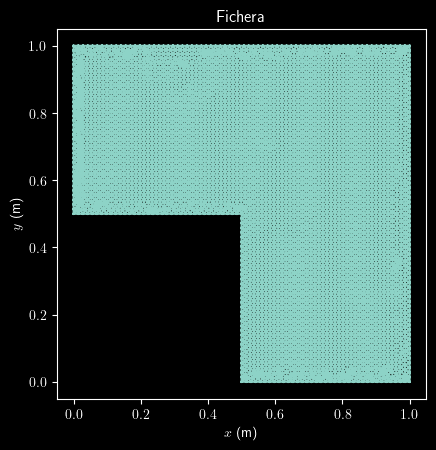

In [118]:
plot_mesh(msh, title='Fichera')

### 2) Right hand side 
#### $f = 1$

In [119]:
b = np.ones((msh.N,))

### 3) Matrix assembly

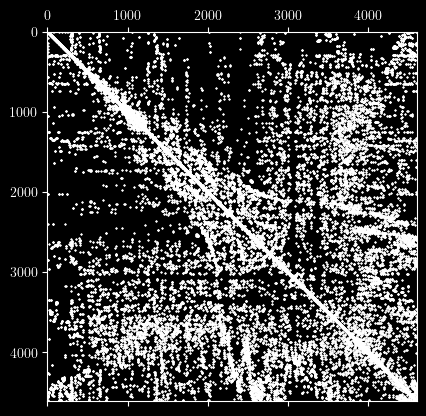

In [120]:
K = stiffness_node(msh)
plt.figure()
plt.spy(K, markersize=.5)

### Boundary conditions

In [121]:
idx_bc = msh.nodes_bnd
# idx_bc = [0,1,2,3]
idx_dof = np.setdiff1d(np.arange(msh.N), idx_bc)

K = K.tocsr()
b = b[idx_dof]
K = K[idx_dof,:][:,idx_dof]

## Solution
### 1) Solve system 
#### $ \begin{align*}
-\Delta u &= f \quad \text{in}\, \Omega \\
u &= 0 \quad \text{on}\, \partial\Omega
\end{align*} $

In [122]:
u_h = np.empty((msh.N,))
u_h[idx_bc] = 0
u_h[idx_dof], info = sp.linalg.cg(K, b)
print(f"gmres terminated with exit code {info}")

gmres terminated with exit code 0


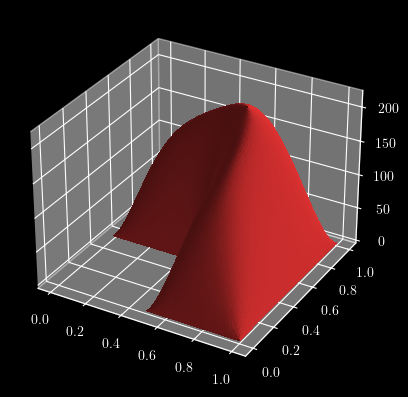

In [123]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(msh.x, msh.y, msh.elems_to_nodes, u_h,
                       color=[0.9, 0.2, 0.2], 
                       # cmap='hot',
                       linewidth=0, 
                       antialiased=False)